In [37]:
from keras.backend import shape
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt

import keras
import keras.utils
from keras import utils as np_utils

from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf


from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils
#  ConvLSTM
from keras.layers import Dense, Activation, Input, LSTM, Bidirectional, Dropout
from keras.models import Sequential, Model
from keras.layers import Conv1DTranspose, Conv1D, MaxPooling1D

from tensorflow.python.client import device_lib

In [38]:
data_full = pd.read_csv('dataset1.csv')
#data_full=data_full.head(-30000)
#data_full=data_full.drop(['e0c', 'hc', 'p0', 'fo', 'pi', 'e0l'], axis=1)
#data_full=data_full.head(20000)

data_full.dropna(inplace = True)
data_full.drop_duplicates(inplace = True)

#print(data_full.info())
print(data_full.shape)

#print(data_full.isnull().sum())
#print(data_full['pi'].describe())

#print(data_full['flw'].isnull())
#print(data_full.describe())
#print(data_full['class'] < 0.0)

y = data_full["class_bot"]
X = data_full.drop("class_bot", 1)

(8386, 69)


<ipython-input-38-f0bb465e8046>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data_full.drop("class_bot", 1)


In [39]:
scaler = MinMaxScaler(feature_range = (0,1))
x = scaler.fit_transform(X)

x = x.reshape(8386, 1, 68)

X_train, X_test, y_train , y_test = train_test_split(x , y, test_size=0.3 , random_state = 1)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)


model = models.Sequential()


model.add(LSTM(50,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))
model.add(LSTM(256,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))
model.add(LSTM(64,input_shape=(X_train.shape[1], X_train.shape[2]),activation='relu', return_sequences =True))


model.add(Dense(64, kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))
#model.add(Dense(256, kernel_regularizer=keras.regularizers.l2(0.001)))
#model.add(Dropout(0.2))
#model.add(Dense(64 , kernel_regularizer=keras.regularizers.l2(0.001)))
#model.add(Dropout(0.2))






model.add(layers.Dense(1, activation='sigmoid'))
# FIT / TRAIN model

model.compile(optimizer="RMSProp", loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=100,validation_data=(X_test,y_test) )

X_train:  (5870, 1, 68)
X_test:  (2516, 1, 68)
y_train:  (5870,)
y_test:  (2516,)
Epoch 1/100
184/184 [==============================] - 8s 20ms/step - loss: 0.4461 - accuracy: 0.7731 - val_loss: 0.1331 - val_accuracy: 0.9607
Epoch 2/100
184/184 [==============================] - 4s 21ms/step - loss: 0.0780 - accuracy: 0.9826 - val_loss: 0.0492 - val_accuracy: 0.9893
Epoch 3/100
184/184 [==============================] - 4s 23ms/step - loss: 0.0599 - accuracy: 0.9859 - val_loss: 0.0410 - val_accuracy: 0.9897
Epoch 4/100
184/184 [==============================] - 3s 18ms/step - loss: 0.0529 - accuracy: 0.9872 - val_loss: 0.0353 - val_accuracy: 0.9893
Epoch 5/100
184/184 [==============================] - 6s 31ms/step - loss: 0.0478 - accuracy: 0.9884 - val_loss: 0.0336 - val_accuracy: 0.9901
Epoch 6/100
184/184 [==============================] - 7s 39ms/step - loss: 0.0442 - accuracy: 0.9881 - val_loss: 0.0343 - val_accuracy: 0.9905
Epoch 7/100
184/184 [==============================] -

In [40]:
results = model.evaluate(X_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

79/79 [==============================] - 0s 5ms/step - loss: 0.0279 - accuracy: 0.9944
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.027918687090277672, 0.9944356083869934]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
import numpy
p_pred = model.predict(X_test)
p_pred = p_pred.flatten()
print(p_pred.round(2))
# [1. 0.01 0.91 0.87 0.06 0.95 0.24 0.58 0.78 ...

# extract the predicted class labels
y_pred = numpy.where(p_pred > 0.5, 1, 0)
print(y_pred)

79/79 [==============================] - 1s 4ms/step
[0.19 0.   0.   ... 1.   0.   0.  ]
[0 0 0 ... 1 0 0]


In [42]:
results = model.evaluate(X_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

79/79 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.9944
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.027918687090277672, 0.9944356083869934]


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)

print('F1 score: %f' % f1)


Accuracy: 0.994436
Recall: 0.991281
F1 score: 0.995286


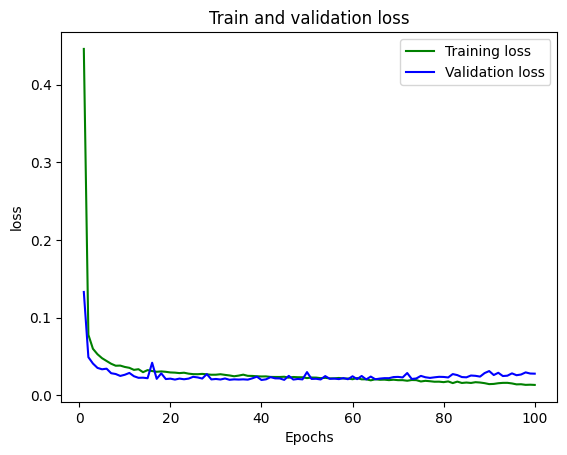

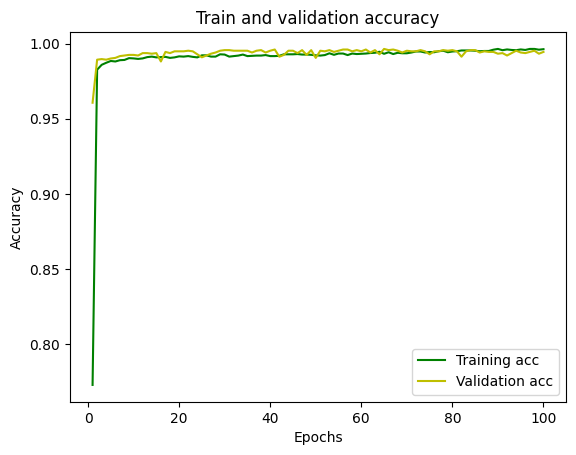

In [44]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+ 1)
plt.plot(epochs ,loss,'g',label='Training loss')
plt.plot(epochs ,val_loss,'b',label='Validation loss')
plt.title('Train and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs ,acc,'g',label='Training acc')
plt.plot(epochs ,val_acc,'y',label='Validation acc')
plt.title('Train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)

print('F1 score: %f' % f1)

Accuracy: 0.994436
Recall: 0.991281
F1 score: 0.995286
